<a href="https://colab.research.google.com/github/mohammad-hosseini-s/Applied-Machine-Learning/blob/master/Assignment_1_Linear_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Applied Machine Learning, Assignment 1: Linear classiers (Perceptron, SVM)
-----

In this assignment, you will explore linear classication on the forest cover-type dataset created by Jock Blackard et. al. in 1998. It is used frequently enough that scikit-learn has made it a standard dataset.  
https://scikit-learn.org/stable/datasets/index.html#covtype-dataset  
https://archive.ics.uci.edu/ml/datasets/Covertype  
The data set includes 54 features (reals, integers, and booleans) and 7 classications numbered 1-7: spruce/firr, lodgepole pine, Ponderosa pine, cottonwood/willow, aspen, Douglas-fir, and Krummholz. The scikit-learn implementation has converted all of these values to real numbers.

## 1. Importing and Partitioning the Data
### 1.1 Get the Data

Using scikit-learn, import the Forest covertype data set, shuffling it with random state 5984 in the call to fetch it. Set these to X and y.

In [ ]:
# import libraries
%matplotlib inline
from sklearn import datasets
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

# fetch dataset, set random_state and shuffle
covtype = datasets.fetch_covtype(data_home=None, download_if_missing=True, random_state=5984, shuffle=True)
X = covtype["data"]
y = covtype["target"]

print("X = \n" + str(X) + "\n")
print("y = " + str(y))

X = 
[[2903.   87.   27. ...    0.    0.    0.]
 [2674.   52.   11. ...    0.    0.    0.]
 [2867.  357.   14. ...    0.    0.    0.]
 ...
 [3053.  166.   18. ...    0.    0.    0.]
 [2981.  352.   18. ...    0.    0.    0.]
 [3041.   37.    5. ...    0.    0.    0.]]

y = [5 2 2 ... 1 2 1]


In [ ]:
print("X dim =", X.shape, "\ny dim =", y.shape)

X dim = (581012, 54) 
y dim = (581012,)


-----
### 1.2 Checking the Labels

How many instances of each of the seven classes exist in the data set?

In [ ]:
for i in range(1,8):
    name = "instances in class_" + str(i) + " ="
    print(name, y[y == i].shape)

instances in class_1 = (211840,)
instances in class_2 = (283301,)
instances in class_3 = (35754,)
instances in class_4 = (2747,)
instances in class_5 = (9493,)
instances in class_6 = (17367,)
instances in class_7 = (20510,)


-----
### 1.3 Choosing Subsets 

Create data and label subsets of size 5000, 10000, and 100000, choosing the first
N elements of the shued imported data.

In [ ]:
X_5k, y_5k = X[0:5000,:], y[0:5000]
X_10k, y_10k = X[0:10000,:], y[0:10000]
X_100k, y_100k = X[0:100000,:], y[0:100000]

-----
### 1.4 Splitting the Subsets into Training and Test Sets

Use `train_test_split` to set aside 20% of each test set with random state 5984.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_5k, X_test_5k, y_train_5k, y_test_5k = train_test_split(X_5k, y_5k, test_size=0.20, random_state=5984)
X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(X_10k, y_10k, test_size=0.20, random_state=5984)
X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(X_100k, y_100k, test_size=0.20, random_state=5984)

-----
### 1.5 Remaking the Labels for Binary Classication

For each y subset, create a label vector that indicates if each label is spruce/fir
(1) or not (0). Use the subsets you already created as the basis for this.

In [ ]:
from sklearn import preprocessing

# binary values for spruce/fir label
lb = preprocessing.LabelBinarizer()
y_train_5k_lb = lb.fit_transform(y_train_5k == 1).ravel()
y_train_10k_lb = lb.fit_transform(y_train_10k == 1).ravel()
y_train_100k_lb = lb.fit_transform(y_train_100k == 1).ravel()

y_test_5k_lb = lb.fit_transform(y_test_5k == 1).ravel()
y_test_10k_lb = lb.fit_transform(y_test_10k == 1).ravel()
y_test_100k_lb = lb.fit_transform(y_test_100k == 1).ravel()

## as an example just to check
print("5k: original labels =", y_train_5k)
print("5k: binary labels   =", y_train_5k_lb)

5k: original labels = [1 2 3 ... 2 6 2]
5k: binary labels   = [1 0 0 ... 0 0 0]


-----
### 1.6 Baseline Accuracy

For each training subset, calculate the accuracy of a NOT spruce/fir" estimator,
that is, one that outputs 0 for every input. Hint: the sum of the labels in each
training label subset can be used to quickly calculate this value without making
a specfic function.

In [ ]:
## a classifier that say every inputs is NOT spruce/fir
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class Never1Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
## 5k sample
never_1_clf_5k = Never1Classifier()
never_1_clf_5k_acc = cross_val_score(never_1_clf_5k, X_train_5k, y_train_5k_lb, scoring="accuracy")
print("5k: accuracy of folds = " + str(never_1_clf_5k_acc.round(5)))
print("5k: av. accuracy of folds = " + str(np.mean(never_1_clf_5k_acc).round(5)))

# accuracy using the labels
manual_5k_acc = y_train_5k_lb[y_train_5k_lb == 0].size / y_train_5k_lb.size
print("5k: accuracy using labels = " + str(round(manual_5k_acc, 5)) + "\n")

5k: accuracy of folds = [0.66    0.6575  0.62875 0.62375 0.6375 ]
5k: av. accuracy of folds = 0.6415
5k: accuracy using labels = 0.6415



In [ ]:
## 10k sample
never_1_clf_10k = Never1Classifier()
never_1_clf_10k_acc = cross_val_score(never_1_clf_10k, X_train_10k, y_train_10k_lb, scoring="accuracy")
print("10k: accuracy of folds = " + str(never_1_clf_10k_acc.round(5)))
print("10k: av. accuracy of folds = " + str(np.mean(never_1_clf_10k_acc).round(5)))

# accuracy using the labels
manual_10k_acc = y_train_10k_lb[y_train_10k_lb == 0].size / y_train_10k_lb.size
print("10k: accuracy using labels = " + str(round(manual_10k_acc, 5)) + "\n")

10k: accuracy of folds = [0.635   0.64875 0.64438 0.62687 0.64562]
10k: av. accuracy of folds = 0.64013
10k: accuracy using labels = 0.64013



In [ ]:
## 100k sample
never_1_clf_100k = Never1Classifier()
never_1_clf_100k_acc = cross_val_score(never_1_clf_100k, X_train_100k, y_train_100k_lb, scoring="accuracy")
print("100k: accuracy of folds = " + str(never_1_clf_100k_acc.round(5)))
print("100k: av. accuracy of folds = " + str(np.mean(never_1_clf_100k_acc).round(5)))

# accuracy using the labels
manual_100k_acc = y_train_100k_lb[y_train_100k_lb == 0].size / y_train_100k_lb.size
print("100k: accuracy using labels = " + str(round(manual_100k_acc, 5)))

100k: accuracy of folds = [0.6325  0.638   0.63513 0.63475 0.63356]
100k: av. accuracy of folds = 0.63479
100k: accuracy using labels = 0.63479


-----
## 2. Perceptron Classication

For the 5000 sample and 100000 sample subsets, you will create a Perceptron
classifier that determines whether each sample point is spruce/fir or not.

### 2.1 Perceptron Analysis

For each binary data and label subset, train the `Perceptron` classifier with no
added arguments, using only the training subsets.

In [ ]:
from sklearn.linear_model import Perceptron

## perceptron for 5k sample
clf = Perceptron()
perc_clf_5k = clf.fit(X_train_5k, y_train_5k_lb)
print(perc_clf_5k)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
## intecept and coefficients
print("intercept = " + str(perc_clf_5k.intercept_) + "\n")
print("coefficients = \n" + str(perc_clf_5k.coef_))

intercept = [-830.]

coefficients = 
[[ 2.36920e+04 -8.62500e+03 -4.08030e+04 -1.08500e+04 -2.99760e+04
  -5.08500e+03 -1.63245e+05 -1.21804e+05 -4.31710e+04 -2.18500e+03
   4.85000e+02  7.73000e+02 -1.44500e+03 -6.43000e+02 -2.70000e+01
  -1.18000e+02 -5.70000e+01 -2.29000e+02 -2.10000e+01 -8.90000e+01
   0.00000e+00 -6.00000e+00  9.00000e+00 -9.23000e+02 -2.96000e+02
  -6.96000e+02 -3.77000e+02 -1.40000e+01  0.00000e+00 -4.20000e+01
  -8.90000e+01 -8.00000e+00  5.40000e+01  1.62000e+02  7.80000e+01
   1.18800e+03  1.69500e+03  2.80000e+02 -1.50000e+01 -8.50000e+01
  -1.00000e+01 -3.30000e+01 -6.96000e+02 -3.11000e+02 -6.60000e+01
  -1.15000e+02 -2.12000e+02 -3.10000e+01  2.00000e+00 -1.10000e+01
  -8.00000e+00  2.58000e+02 -8.10000e+01  1.10000e+02]]


In [ ]:
## perceptron for 100k sample
perc_clf_100k = clf.fit(X_train_100k, y_train_100k_lb)
print(perc_clf_100k)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
## intercept and coefficients
print("intercept = " + str(perc_clf_100k.intercept_) + "\n")
print("coefficients = \n" + str(perc_clf_100k.coef_))

intercept = [-6011.]

coefficients = 
[[ 4.16210e+04 -5.85200e+03 -4.94300e+05 -1.44390e+04 -2.42920e+04
  -1.41300e+03 -3.63998e+05 -2.40740e+04 -2.18044e+05 -1.02000e+03
   1.02980e+04  2.67300e+03 -1.68680e+04 -2.11400e+03 -5.90000e+01
  -5.58000e+02 -2.42000e+02 -1.05100e+03 -2.80000e+01 -1.86000e+02
  -1.11000e+02 -4.30000e+01  4.76000e+02 -5.95700e+03 -2.19400e+03
  -9.01400e+03 -4.31000e+03 -1.40000e+01  0.00000e+00 -2.90000e+01
  -3.96000e+02 -2.91000e+02  1.48400e+03  2.04600e+03  9.19000e+02
   2.22450e+04  2.43180e+04  2.40000e+01 -2.01000e+02 -6.42000e+02
   5.52000e+02 -3.80000e+02 -9.53000e+03 -5.92800e+03  1.64500e+03
  -4.60800e+03 -2.70000e+02 -8.23000e+02 -1.05000e+03 -6.50000e+01
  -4.95000e+02 -3.82200e+03 -4.50900e+03 -2.91400e+03]]


-----
#### 2.1.1 Accuracy on the training sets and the test sets

What is the accuracy on the training sets and the test sets?

In [ ]:
## 5k samples
perc_clf_5k_train_acc = perc_clf_5k.score(X_train_5k, y_train_5k_lb)
perc_clf_5k_test_acc = perc_clf_5k.score(X_test_5k, y_test_5k_lb)

print("5k: training set accuracy = " + str(perc_clf_5k_train_acc))
print("5k: test set accuracy     = " + str(perc_clf_5k_test_acc))

5k: training set accuracy = 0.72375
5k: test set accuracy     = 0.724


In [ ]:
## 100k samples
perc_clf_100k_train_acc = perc_clf_100k.score(X_train_100k, y_train_100k_lb)
perc_clf_100k_test_acc = perc_clf_100k.score(X_test_100k, y_test_100k_lb)

print("100k: training set accuracy = " + str(perc_clf_100k_train_acc))
print("100k: test set accuracy     = " + str(perc_clf_100k_test_acc))

100k: training set accuracy = 0.7195875
100k: test set accuracy     = 0.7166


-----
#### 2.1.2 Confusion matrices

What is the confusion matrix on the test sets? Use the predicted labels
as a basis for comparison to the true labels for each test set. What does
the confusion matrix tell you about the classifier's ability to correctly and
incorrectly predict whether each sample is a spruce/fir cover or not?

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

## 5k sample
print("===============================================")
print("5k: number of true (1) labels in test set = " + str(y_test_5k_lb[y_test_5k_lb == 1].size))
print("===============================================\n" + "confusion matrix =")

perc_clf_5k_test_pred = perc_clf_5k.predict(X_test_5k)
confusion_matrix(y_test_5k_lb, perc_clf_5k_test_pred)
# First row is 0's, second row is 1's
# First column is number correctly predicted, second is incorrectly predicted"

5k: number of true (1) labels in test set = 377
confusion matrix =


array([[569,  54],
       [222, 155]])

In [ ]:
## 100k sample
print("==================================================")
print("100k: number of true (1) labels in test set = " + str(y_test_100k_lb[y_test_100k_lb == 1].size))
print("==================================================\n" + "confusion matrix =")

perc_clf_100k_test_pred = perc_clf_100k.predict(X_test_100k)
confusion_matrix(y_test_100k_lb, perc_clf_100k_test_pred)
# First row is 0's, second row is 1's
# First column is number correctly predicted, second is incorrectly predicted"

100k: number of true (1) labels in test set = 7191
confusion matrix =


array([[11400,  1409],
       [ 4259,  2932]])

>  **Answer**:  
> We can see that the number of False-Postives and False-Negatives on the off-diagonal entries for both samples sizes, is not small compared to the number of correctly predicted labels. This means our calssifier is not doing a good job predicting the binary labels.

-----
#### 2.1.3 Precision and recall

What are the precision and recall on the test sets?

In [ ]:
from sklearn.metrics import precision_score, recall_score

## 5k sample
perc_clf_5k_test_pred_precision = precision_score(y_test_5k_lb, perc_clf_5k_test_pred)
perc_clf_5k_test_pred_recall = recall_score(y_test_5k_lb, perc_clf_5k_test_pred)
print("5k: precision = " + str(perc_clf_5k_test_pred_precision))
print("5k: recall    = " + str(perc_clf_5k_test_pred_recall) + "\n")

5k: precision = 0.7416267942583732
5k: recall    = 0.41114058355437666



In [ ]:
## 100k sample
perc_clf_100k_test_pred_precision = precision_score(y_test_100k_lb, perc_clf_100k_test_pred)
perc_clf_100k_test_pred_recall = recall_score(y_test_100k_lb, perc_clf_100k_test_pred)
print("100k: precision = " + str(perc_clf_100k_test_pred_precision))
print("100k: recall    = " + str(perc_clf_100k_test_pred_recall))

100k: precision = 0.6754204100437687
100k: recall    = 0.40773188708107355


-----
#### 2.1.4 Precision and recall vs. threshold plot

Using the decision function as the threshold, plot precision and recall vs.
threshold.

In [ ]:
## helper function
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

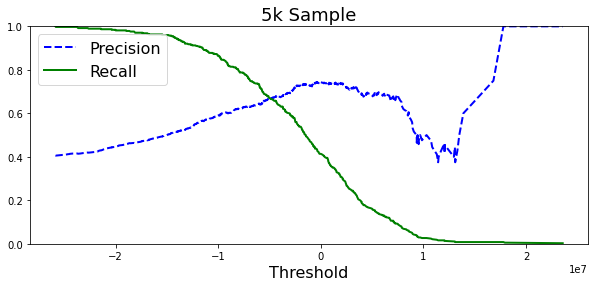

In [ ]:
from sklearn.metrics import precision_recall_curve

## 5k samples
perc_5k_test_y_scores = perc_clf_5k.decision_function(X_test_5k)
perc_5k_precisions, perc_5k_recalls, perc_5k_thresholds = precision_recall_curve(y_test_5k_lb, perc_5k_test_y_scores)

plt.figure(figsize=(10, 4))
plt.title("5k Sample", fontsize=18)
plot_precision_recall_vs_threshold(perc_5k_precisions, perc_5k_recalls, perc_5k_thresholds)
plt.show()

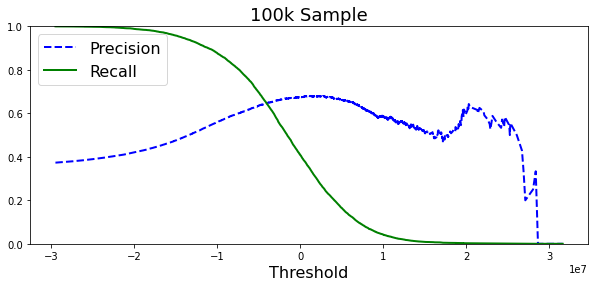

In [ ]:
## 100k sample
perc_100k_test_y_scores = perc_clf_100k.decision_function(X_test_100k)
perc_100k_precisions, perc_100k_recalls, perc_100k_thresholds = precision_recall_curve(y_test_100k_lb, perc_100k_test_y_scores)

plt.figure(figsize=(10, 4))
plt.title("100k Sample", fontsize=18)
plot_precision_recall_vs_threshold(perc_100k_precisions, perc_100k_recalls, perc_100k_thresholds)
plt.show()

----

-----
#### 2.1.5 F score

Using the decision function as the threshold, what threshold value maximizes the F score, and what is the value?

> **Answer**:   
>`F-score` maximizes at the point where the percision and recall are very close or equal to 1.

In [ ]:
## 5k samples
perc_5k_test_y_scores = perc_clf_5k.decision_function(X_test_5k)
perc_5k_precisions, perc_5k_recalls, perc_5k_thresholds = precision_recall_curve(y_test_5k_lb, perc_5k_test_y_scores)

f1_scores_5k = 2*perc_5k_recalls*perc_5k_precisions/(perc_5k_recalls + perc_5k_precisions)
print('5k: best threshold = ', perc_5k_thresholds[np.argmax(f1_scores_5k)])
print('5k: best F1-Score  = ', np.nanmax(f1_scores_5k).round(5))

5k: best threshold =  -9447000.0
5k: best F1-Score  =  0.70575


In [ ]:
## 100k sample
perc_100k_test_y_scores = perc_clf_100k.decision_function(X_test_100k)
perc_100k_precisions, perc_100k_recalls, perc_100k_thresholds = precision_recall_curve(y_test_100k_lb, perc_100k_test_y_scores)
                                                                                       
f1_scores_100k = 2*perc_100k_recalls*perc_100k_precisions/(perc_100k_recalls + perc_100k_precisions)
print('100k: best threshold = ', perc_100k_thresholds[np.argmax(f1_scores_100k)])
print('100k: best F1-Score  = ', np.nanmax(f1_scores_100k).round(5))

100k: best threshold =  28655956.0
100k: best F1-Score  =  0.68904


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


### 2.2 Evaluation

Would you say the old-fashioned Perceptron algorithm is useful for this data
set? Is it better than a NOT spruce/fir" classifier in any scenario? Why or why
not?

In [ ]:
perc_clf_10k_test_acc = perc_clf_100k.score(X_test_10k, y_test_10k_lb)
perc_clf_10k_test_pred = perc_clf_100k.predict(X_test_10k)
perc_clf_10k_test_pred_precision = precision_score(y_test_10k_lb, perc_clf_10k_test_pred)
perc_clf_10k_test_pred_recall = recall_score(y_test_10k_lb, perc_clf_10k_test_pred)

print("test set accuracy of perc_clf = " + str(perc_clf_10k_test_acc))
print(">> precision for perc_clf = " + str(perc_clf_10k_test_pred_precision.round(5)))
print(">> recall for perc_clf    = " + str(perc_clf_10k_test_pred_recall.round(5)))

## never-1-calssifier defined in Problem 1
never_1_clf_10k_acc = cross_val_score(never_1_clf_10k, X_train_10k, y_train_10k_lb, scoring="accuracy")
print("\nave_CV accuracy of never_1_clf = " + str(np.mean(never_1_clf_10k_acc).round(4)))

test set accuracy of perc_clf = 0.717
>> precision for perc_clf = 0.69362
>> recall for perc_clf    = 0.43583

ave_CV accuracy of never_1_clf = 0.6401


> **Answer**:   
> Blindly labeling every point with `0` is 64% accurate whereas running the perceptron gives the accuracy of 71%, slightly better than the `never_1_clf`. Using perceptron does not seem to be useful with this accuracy. 

-----
## 3. Support Vector Machine Binary Classication

In this problem you will use the 10000 sample subset you made back in Problem
1 and will learn how to use grid search to tune hyperparameters to get the
performance you want.

### 3.1 Scaling and Solver Speed

For `C=1`, `polydeg=3`, `class weight=None`, create a both `SVC` classifer, and a
`Pipeline` that uses `StandardScalar` to scale the `X` subset prior to using another `SVC` classifier. Try running both. What can you say about the relative speeds?
Why do you think this is happening?

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import time

## SVM with unscaled dataset
svm_clf_poly_unscaled = SVC(C=1.0, degree=3, class_weight=None, kernel='poly')
svm_clf_poly_unscaled

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
time_start_unscaled = time.perf_counter()
svm_clf_poly_unscaled.fit(X_train_10k, y_train_10k_lb)

time_elapsed_unscaled = (time.perf_counter() - time_start_unscaled)
print ("unscaled dataset computation time = %5.1f secs" % time_elapsed_unscaled + "\n")

unscaled dataset computation time =   4.2 secs



In [ ]:
## SVM with scaled dataset
svm_clf_poly_scaled = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(C=1.0, degree=3, class_weight=None, kernel='poly'))
    ])
svm_clf_poly_scaled

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
time_start_scaled = time.perf_counter()
svm_clf_poly_scaled.fit(X_train_10k, y_train_10k_lb)

time_elapsed_scaled = (time.perf_counter() - time_start_scaled)
print ("scaled dataset computation time = %5.1f secs" % time_elapsed_scaled)

scaled dataset computation time =   3.9 secs


> **Answer**:   
> The program computes faster with the scaled data since the variance in all directions is 1 and data set in not skewed (balanced) which helps the solver to find the solution faster and makes the SVM more reliable.

-----
### 3.2 Polynomial Kernel Grid Search

Without using scikit-learn's `GridSearchCV` module, create a loop that trains an
SVC over each combination of the following parameters:

In [ ]:
Cs = [0.001,1,100]
class_weights = [None,'balanced']
polydegs = [3,5,7]

If you did this right, you should have 18 different classifiers. Hint: use
Python's `itertools.product` to generate the 18 option sets without using 3
nested for loops.

In [ ]:
import itertools

classifier_name_list = []
for i,comb in enumerate(itertools.product(Cs, class_weights, polydegs)):
    degree = comb[2]
    class_weight = comb[1]
    C = comb[0]
    
    global name
    if C != Cs[0]:
        name = "svm_poly" + str(comb[2]) + "_" +  str(comb[1]) + "_C" +  str(comb[0])
    else:
        name = "svm_poly" + str(comb[2]) + "_" +  str(comb[1]) + "_C001"
    
    classifier_name_list.append(name)
    print("classifier", str(i) + ":", classifier_name_list[i])
    
    globals()[name] = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(C=C, degree=degree, class_weight=class_weight, kernel='poly'))
        ])

classifier 0: svm_poly3_None_C001
classifier 1: svm_poly5_None_C001
classifier 2: svm_poly7_None_C001
classifier 3: svm_poly3_balanced_C001
classifier 4: svm_poly5_balanced_C001
classifier 5: svm_poly7_balanced_C001
classifier 6: svm_poly3_None_C1
classifier 7: svm_poly5_None_C1
classifier 8: svm_poly7_None_C1
classifier 9: svm_poly3_balanced_C1
classifier 10: svm_poly5_balanced_C1
classifier 11: svm_poly7_balanced_C1
classifier 12: svm_poly3_None_C100
classifier 13: svm_poly5_None_C100
classifier 14: svm_poly7_None_C100
classifier 15: svm_poly3_balanced_C100
classifier 16: svm_poly5_balanced_C100
classifier 17: svm_poly7_balanced_C100


In [ ]:
## an example to check if everything is fine
svm_poly7_balanced_C001

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=7, gamma='scale',
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

-----
#### 3.2.1 Accuracy scores

Use `cross_val_score` to generate accuracy scores for each validation set.
Using the average CV score, what is the best combination?

> **Answer**:   
> We pick the one with the highest CV score mean.

In [ ]:
classifier_acc = {}
classifier_acc_mean = {}

for i in range(0,len(classifier_name_list)):
    time_start = time.perf_counter()
    
    classifier = globals()[classifier_name_list[i]]
    temp_acc = cross_val_score(classifier, X_train_10k, y_train_10k_lb, scoring="accuracy")
    classifier_acc[classifier_name_list[i]] = temp_acc
    classifier_acc_mean[classifier_name_list[i]] = np.mean(temp_acc)
    
    time_elapsed = (time.perf_counter() - time_start)
    print ("iteration", i+1, "=%5.1f secs" % time_elapsed)

iteration 1 = 20.8 secs
iteration 2 = 21.0 secs
iteration 3 = 20.3 secs
iteration 4 = 40.4 secs
iteration 5 = 29.1 secs
iteration 6 = 28.9 secs
iteration 7 = 16.5 secs
iteration 8 = 20.2 secs
iteration 9 = 21.9 secs
iteration 10 = 21.5 secs
iteration 11 = 24.5 secs
iteration 12 = 30.4 secs
iteration 13 = 34.3 secs
iteration 14 = 25.7 secs
iteration 15 = 25.6 secs
iteration 16 = 27.6 secs
iteration 17 = 33.0 secs
iteration 18 = 29.9 secs


In [ ]:
## accuracy for CV folds
for i, key in enumerate(classifier_acc.keys()):
    if i == 0: print("accuracy for classifiers using CV:\n")
    print(str(key) + " = " + str(classifier_acc[key].round(5)))

accuracy for classifiers using CV:

svm_poly3_None_C001 = [0.64188 0.64188 0.6425  0.63938 0.64312]
svm_poly5_None_C001 = [0.64312 0.64562 0.64375 0.64188 0.6425 ]
svm_poly7_None_C001 = [0.64312 0.64938 0.64562 0.63875 0.64625]
svm_poly3_balanced_C001 = [0.38    0.38    0.37688 0.3825  0.38875]
svm_poly5_balanced_C001 = [0.40875 0.41688 0.41062 0.41812 0.43062]
svm_poly7_balanced_C001 = [0.42188 0.42062 0.42312 0.43    0.44   ]
svm_poly3_None_C1 = [0.76312 0.7575  0.7725  0.76312 0.7525 ]
svm_poly5_None_C1 = [0.71938 0.7375  0.725   0.71375 0.71812]
svm_poly7_None_C1 = [0.69375 0.69812 0.68875 0.67062 0.69188]
svm_poly3_balanced_C1 = [0.72375 0.74625 0.73812 0.705   0.7675 ]
svm_poly5_balanced_C1 = [0.62062 0.635   0.63438 0.62438 0.66938]
svm_poly7_balanced_C1 = [0.56625 0.56063 0.56625 0.55188 0.6325 ]
svm_poly3_None_C100 = [0.80625 0.81875 0.82375 0.82688 0.81625]
svm_poly5_None_C100 = [0.81062 0.81625 0.80812 0.80062 0.79938]
svm_poly7_None_C100 = [0.79    0.78188 0.7725  0.77188 0

In [ ]:
## average accuracy of the folds
for i, key in enumerate(classifier_acc_mean.keys()):
    if i == 0:
        print("average accuracy of the folds for the classifiers:\n")        
    print(str(key) + " = " + str(classifier_acc_mean[key].round(5)))

average accuracy of the folds for the classifiers:

svm_poly3_None_C001 = 0.64175
svm_poly5_None_C001 = 0.64338
svm_poly7_None_C001 = 0.64462
svm_poly3_balanced_C001 = 0.38162
svm_poly5_balanced_C001 = 0.417
svm_poly7_balanced_C001 = 0.42712
svm_poly3_None_C1 = 0.76175
svm_poly5_None_C1 = 0.72275
svm_poly7_None_C1 = 0.68862
svm_poly3_balanced_C1 = 0.73612
svm_poly5_balanced_C1 = 0.63675
svm_poly7_balanced_C1 = 0.5755
svm_poly3_None_C100 = 0.81838
svm_poly5_None_C100 = 0.807
svm_poly7_None_C100 = 0.778
svm_poly3_balanced_C100 = 0.8055
svm_poly5_balanced_C100 = 0.80113
svm_poly7_balanced_C100 = 0.71487


In [ ]:
## helper function
def clf_spec(classifier_name):
    [type, degree, class_weights, C] = classifier_name.split("_")
    print("\nclassifier name = " + str(classifier_name))
    print("              C = " + str(C[1:])) if C != "C001" else print("              C = 0.001")
    print("         degree = " + str(degree[4:]))
    print("  class_weights = " + str(class_weights))

In [ ]:
## max CV mean among the classifier
classifier_acc_mean_max = np.max(list(classifier_acc_mean.values()))
print("max CV score mean= " + str(classifier_acc_mean_max))

key_cv_max = list(classifier_acc_mean.keys())[list(classifier_acc_mean.values()).index(classifier_acc_mean_max)]
clf_spec(key_cv_max)

max CV score mean= 0.818375

classifier name = svm_poly3_None_C100
              C = 100
         degree = 3
  class_weights = None


----
#### 3.2.2 CV scores vs. the score generated by the overall training set

Compare the average of the CV scores to the score generated by the overall
training set. Which combination overfits the most? The least?

> **Answer**:   
> We calculate the difference between the average CV and the overal accuracy scores. The biggest difference would be the most overfitted model and the smallest difference would be the least overfitted.

In [ ]:
classifier_acc_overall = {}

for i in range(0,len(classifier_name_list)):
    time_start = time.perf_counter()
    
    classifier = globals()[classifier_name_list[i]]
    classifier.fit(X_train_10k, y_train_10k_lb)
    temp_acc_overall = classifier.score(X_train_10k, y_train_10k_lb)
    classifier_acc_overall[classifier_name_list[i]] = temp_acc_overall

    time_elapsed = (time.perf_counter() - time_start)
    print ("iteration", i+1, "=%5.1f secs" % time_elapsed)

iteration 1 =  8.7 secs
iteration 2 =  8.6 secs
iteration 3 =  8.9 secs
iteration 4 = 13.1 secs
iteration 5 = 13.1 secs
iteration 6 = 11.4 secs
iteration 7 =  8.2 secs
iteration 8 = 12.9 secs
iteration 9 = 10.7 secs
iteration 10 = 10.0 secs
iteration 11 = 12.6 secs
iteration 12 = 12.5 secs
iteration 13 = 11.1 secs
iteration 14 =  9.7 secs
iteration 15 =  9.6 secs
iteration 16 =  8.8 secs
iteration 17 =  8.4 secs
iteration 18 = 10.1 secs


In [ ]:
## overall accuracy of the folds
for i, key in enumerate(classifier_acc_overall.keys()):
    if i == 0:
        print("overall accuracy of the classifiers:\n")        
    print(str(key) + " = " + str(classifier_acc_overall[key].round(5)))

overall accuracy of the classifiers:

svm_poly3_None_C001 = 0.64175
svm_poly5_None_C001 = 0.64462
svm_poly7_None_C001 = 0.64938
svm_poly3_balanced_C001 = 0.38512
svm_poly5_balanced_C001 = 0.41925
svm_poly7_balanced_C001 = 0.43262
svm_poly3_None_C1 = 0.77762
svm_poly5_None_C1 = 0.74412
svm_poly7_None_C1 = 0.71462
svm_poly3_balanced_C1 = 0.77025
svm_poly5_balanced_C1 = 0.66212
svm_poly7_balanced_C1 = 0.60788
svm_poly3_None_C100 = 0.872
svm_poly5_None_C100 = 0.874
svm_poly7_None_C100 = 0.83938
svm_poly3_balanced_C100 = 0.861
svm_poly5_balanced_C100 = 0.87012
svm_poly7_balanced_C100 = 0.77938


In [ ]:
## difference between the overall accuracy and the average CV accuracy
classifier_acc_dif = {}
for k in classifier_acc_overall.keys():
    classifier_acc_dif[k] = classifier_acc_overall[k] - classifier_acc_mean[k]
    
classifier_acc_dif_values = np.reshape(list(classifier_acc_dif.values()), len(classifier_acc_dif.values()), 1)
for i,clf in enumerate(classifier_acc_overall.keys()):
    print("CV dif = " + str(classifier_acc_dif_values[i].round(5)) + ", " + str(clf))

CV dif = 0.0, svm_poly3_None_C001
CV dif = 0.00125, svm_poly5_None_C001
CV dif = 0.00475, svm_poly7_None_C001
CV dif = 0.0035, svm_poly3_balanced_C001
CV dif = 0.00225, svm_poly5_balanced_C001
CV dif = 0.0055, svm_poly7_balanced_C001
CV dif = 0.01588, svm_poly3_None_C1
CV dif = 0.02137, svm_poly5_None_C1
CV dif = 0.026, svm_poly7_None_C1
CV dif = 0.03412, svm_poly3_balanced_C1
CV dif = 0.02537, svm_poly5_balanced_C1
CV dif = 0.03238, svm_poly7_balanced_C1
CV dif = 0.05363, svm_poly3_None_C100
CV dif = 0.067, svm_poly5_None_C100
CV dif = 0.06137, svm_poly7_None_C100
CV dif = 0.0555, svm_poly3_balanced_C100
CV dif = 0.069, svm_poly5_balanced_C100
CV dif = 0.0645, svm_poly7_balanced_C100


In [ ]:
clf_cv_dif_min_value = classifier_acc_dif_values.min()
print("min CV difference= " + str(clf_cv_dif_min_value.round(5)))

key_cv_dif_min = list(classifier_acc_dif.keys())[list(classifier_acc_dif.values()).index(clf_cv_dif_min_value)]
clf_spec(key_cv_dif_min)

min CV difference= 0.0

classifier name = svm_poly3_None_C001
              C = 0.001
         degree = 3
  class_weights = None


In [ ]:
clf_cv_dif_max_value = classifier_acc_dif_values.max()
print("max CV difference= " + str(clf_cv_dif_max_value.round(5)))

key_cv_dif_max = list(classifier_acc_dif.keys())[list(classifier_acc_dif.values()).index(clf_cv_dif_max_value)]
clf_spec(key_cv_dif_max)

max CV difference= 0.069

classifier name = svm_poly5_balanced_C100
              C = 100
         degree = 5
  class_weights = balanced


----
#### 3.2.3 The classifier that correctly classifies as many spruce/fir samples as possible

If you wanted a classifier that prioritized correctly classifying as many
spruce/fir samples as possible without concern for misclassifying other
types as spruce/fir, which combination is the best?

> **Answer**:   
> Correctly classifying as many spruce/fir samples as possible without concern for misclassifying other types as spruce/fir means having the highest percision possible. So, we pick the one with the highest recall regradless of recall.

In [ ]:
classifier_precision = {}
classifier_recall = {}

for i in range(0,len(classifier_name_list)):
    time_start = time.perf_counter()
    
    classifier = globals()[classifier_name_list[i]]
    classifier.fit(X_train_10k, y_train_10k_lb)
    svm_clf_10k_train_pred = classifier.predict(X_train_10k)
    classifier_precision[classifier_name_list[i]] = precision_score(y_train_10k_lb, svm_clf_10k_train_pred)
    classifier_recall[classifier_name_list[i]] = recall_score(y_train_10k_lb, svm_clf_10k_train_pred)

    time_elapsed = (time.perf_counter() - time_start)
    print ("iteration", i+1, "=%5.1f secs" % time_elapsed)

iteration 1 =  7.8 secs
iteration 2 =  7.7 secs
iteration 3 =  8.8 secs
iteration 4 = 11.6 secs
iteration 5 = 12.0 secs
iteration 6 = 11.5 secs
iteration 7 =  6.7 secs
iteration 8 =  8.1 secs
iteration 9 =  8.2 secs
iteration 10 =  7.5 secs
iteration 11 =  8.3 secs
iteration 12 =  9.6 secs
iteration 13 =  8.9 secs
iteration 14 =  9.2 secs
iteration 15 = 14.2 secs
iteration 16 =  8.6 secs
iteration 17 =  8.3 secs
iteration 18 = 10.4 secs


In [ ]:
## percision scores of the classifiers
print("percision scores of the classifiers:\n")

for clf in classifier_precision.keys():
    print("percision = " + str(classifier_precision[clf].round(5)) + ", " + str(clf))

percision scores of the classifiers:

percision = 0.93333, svm_poly3_None_C001
percision = 0.8913, svm_poly5_None_C001
percision = 0.89362, svm_poly7_None_C001
percision = 0.369, svm_poly3_balanced_C001
percision = 0.38187, svm_poly5_balanced_C001
percision = 0.38787, svm_poly7_balanced_C001
percision = 0.75253, svm_poly3_None_C1
percision = 0.81325, svm_poly5_None_C1
percision = 0.87157, svm_poly7_None_C1
percision = 0.63187, svm_poly3_balanced_C1
percision = 0.51679, svm_poly5_balanced_C1
percision = 0.47801, svm_poly7_balanced_C1
percision = 0.84725, svm_poly3_None_C100
percision = 0.88293, svm_poly5_None_C100
percision = 0.90498, svm_poly7_None_C100
percision = 0.7635, svm_poly3_balanced_C100
percision = 0.78032, svm_poly5_balanced_C100
percision = 0.62717, svm_poly7_balanced_C100


In [ ]:
## maximum precision score classifier
classifier_precision_values = np.reshape(list(classifier_precision.values()), len(classifier_precision.values()), 1)
classifier_precision_max_value = classifier_precision_values.max()
print("max precision score = " + str(classifier_precision_max_value.round(5)))

key_precision_max_value = list(classifier_precision.keys())[list(classifier_precision.values()).index(classifier_precision_max_value)]
clf_spec(key_precision_max_value)

max precision score = 0.93333

classifier name = svm_poly3_None_C001
              C = 0.001
         degree = 3
  class_weights = None


----
#### 3.2.4 Making sure other cover types are not classified as spruce/fir

If you wanted a classifier that prioritized making sure other cover types
are not classified as spruce/fir even if it means misclassifying spruce/r
types incorrectly, which combination is the best?

> **Answer**:   
> Making sure other cover types are not classified as spruce/fir even if misclassifying spruce/fir
types incorrectly implies having the highest recall (or the minimum false negatives) possible. So, we pick the one with the highest recall score regradless of recall.

In [ ]:
## recall scores of the classifiers
print("recall scores of the classifiers:\n")

for clf in classifier_recall.keys():
    print("recall = " + str(classifier_recall[clf].round(5)) + ", " + str(clf))

recall scores of the classifiers:

recall = 0.00486, svm_poly3_None_C001
recall = 0.01424, svm_poly5_None_C001
recall = 0.02918, svm_poly7_None_C001
recall = 0.99792, svm_poly3_balanced_C001
recall = 0.99201, svm_poly5_balanced_C001
recall = 0.99722, svm_poly7_balanced_C001
recall = 0.56929, svm_poly3_None_C1
recall = 0.37513, svm_poly5_None_C1
recall = 0.24279, svm_poly7_None_C1
recall = 0.86627, svm_poly3_balanced_C1
recall = 0.94095, svm_poly5_balanced_C1
recall = 0.97395, svm_poly7_balanced_C1
recall = 0.78604, svm_poly3_None_C100
recall = 0.74922, svm_poly5_None_C100
recall = 0.61862, svm_poly7_None_C100
recall = 0.8892, svm_poly3_balanced_C100
recall = 0.88954, svm_poly5_balanced_C100
recall = 0.95415, svm_poly7_balanced_C100


In [ ]:
## maximum recall classifier
classifier_recall_values = np.reshape(list(classifier_recall.values()), len(classifier_recall.values()), 1)
classifier_recall_max_value = classifier_recall_values.max()
print("max recall score = " + str(classifier_recall_max_value.round(5)))

key_recall_max_value = list(classifier_recall.keys())[list(classifier_recall.values()).index(classifier_recall_max_value)]
clf_spec(key_recall_max_value)

max recall score = 0.99792

classifier name = svm_poly3_balanced_C001
              C = 0.001
         degree = 3
  class_weights = balanced


----
#### 3.2.5 Accuracy score for each combination of options on the test set

Find the accuracy score for each combination of options on the test set.
Which combination actually worked the best on the test set?

In [ ]:
classifier_test_acc = {}

for i in range(0,len(classifier_name_list)):
    time_start = time.perf_counter()
    
    classifier = globals()[classifier_name_list[i]]
    classifier_test_acc[classifier_name_list[i]] = classifier.score(X_test_10k, y_test_10k_lb)
    
    time_elapsed = (time.perf_counter() - time_start)
    print ("iteration", i+1, "=%5.1f secs" % time_elapsed)

iteration 1 =  0.7 secs
iteration 2 =  0.8 secs
iteration 3 =  0.9 secs
iteration 4 =  1.1 secs
iteration 5 =  1.0 secs
iteration 6 =  1.1 secs
iteration 7 =  0.8 secs
iteration 8 =  0.8 secs
iteration 9 =  0.7 secs
iteration 10 =  0.7 secs
iteration 11 =  0.9 secs
iteration 12 =  0.8 secs
iteration 13 =  0.4 secs
iteration 14 =  0.5 secs
iteration 15 =  0.6 secs
iteration 16 =  0.5 secs
iteration 17 =  0.6 secs
iteration 18 =  0.6 secs


In [ ]:
## accuracy scores of the classifiers on the test set
print("accuracy scores of the classifiers on the test set:\n")

for clf in classifier_test_acc.keys():
    print("accuracy = " + str(classifier_test_acc[clf].round(5)) + ", " + str(clf))

accuracy scores of the classifiers on the test set:

accuracy = 0.6265, svm_poly3_None_C001
accuracy = 0.6285, svm_poly5_None_C001
accuracy = 0.6295, svm_poly7_None_C001
accuracy = 0.395, svm_poly3_balanced_C001
accuracy = 0.426, svm_poly5_balanced_C001
accuracy = 0.437, svm_poly7_balanced_C001
accuracy = 0.7535, svm_poly3_None_C1
accuracy = 0.7155, svm_poly5_None_C1
accuracy = 0.681, svm_poly7_None_C1
accuracy = 0.7515, svm_poly3_balanced_C1
accuracy = 0.634, svm_poly5_balanced_C1
accuracy = 0.583, svm_poly7_balanced_C1
accuracy = 0.8285, svm_poly3_None_C100
accuracy = 0.819, svm_poly5_None_C100
accuracy = 0.7875, svm_poly7_None_C100
accuracy = 0.8125, svm_poly3_balanced_C100
accuracy = 0.8055, svm_poly5_balanced_C100
accuracy = 0.736, svm_poly7_balanced_C100


In [ ]:
## maximum accuracy classifier
classifier_test_acc_values = np.reshape(list(classifier_test_acc.values()), len(classifier_test_acc.values()), 1)
classifier_test_acc_max_value = classifier_test_acc_values.max()
print("max accuracy score = " + str(classifier_test_acc_max_value.round(5)))

key_acc_max_value = list(classifier_test_acc.keys())[list(classifier_test_acc.values()).index(classifier_test_acc_max_value)]
clf_spec(key_acc_max_value)

max accuracy score = 0.8285

classifier name = svm_poly3_None_C100
              C = 100
         degree = 3
  class_weights = None


----
#### 3.2.6 Overall effect of increasing C

What was the overall effect of increasing C?

> **Answer**:   
> We take the standard case of `polyDeg = 3` and `class_weight=None` to study the effect of `C` using our classifiers and the evaluation of their performance.

In [ ]:
## helper function
def clf_eval(classifier_name_list, criteria):
    '''
    returns the accuracy criteria measure before
    for the list of the names of the classifiers provided.
    '''
    assert criteria in ["C", "degree", "class_weight"], '>>> InputError: criteria NOT in ["C", "degree", "class_weight"]! <<<\n'
    
    for i in range(0, len(classifier_name_list)):
        clf_acc = classifier_acc[classifier_name_list[i]]
        clf_acc_mean = classifier_acc_mean[classifier_name_list[i]]
        clf_acc_overall = classifier_acc_overall[classifier_name_list[i]]
        clf_precision = classifier_precision[classifier_name_list[i]]
        clf_recall = classifier_recall[classifier_name_list[i]]
        clf_test_acc = classifier_test_acc[classifier_name_list[i]]
        
        [type, degree, class_weights, C] = classifier_name_list[i].split("_")
        if C == "C001":
            C = "C0.001"
        
        if criteria == "C":
            print("clf_CV_mean = " + str(clf_acc_mean.round(3)) + ", " +
                 "clf_acc_overall = " + str(clf_acc_overall.round(3)) + ", " +
                 "clf_precision = " + str(clf_precision.round(3)) + ", " +
                 "clf_recall = " + str(clf_recall.round(3)) + ", " +
                 "clf_test_acc = " + str(clf_test_acc.round(3)) + "   |C = " + C[1:])
            
        elif criteria == "degree":
            print("clf_CV_mean = " + str(clf_acc_mean.round(3)) + ", " +
                 "clf_acc_overall = " + str(clf_acc_overall.round(3)) + ", " +
                 "clf_precision = " + str(clf_precision.round(3)) + ", " +
                 "clf_recall = " + str(clf_recall.round(3)) + ", " +
                 "clf_test_acc = " + str(clf_test_acc.round(3)) + "   |degree = " + degree[4:])
        else:
            print("clf_CV_mean = " + str(clf_acc_mean.round(3)) + ", " +
                 "clf_acc_overall = " + str(clf_acc_overall.round(3)) + ", " +
                 "clf_precision = " + str(clf_precision.round(3)) + ", " +
                 "clf_recall = " + str(clf_recall.round(3)) + ", " +
                 "clf_test_acc = " + str(clf_test_acc.round(3)) + "|weight = " + class_weights)
        

In [ ]:
classifier_compar_C = ["svm_poly3_None_C001",
                       "svm_poly3_None_C1",
                       "svm_poly3_None_C100"]

clf_eval(classifier_compar_C, "C")

clf_CV_mean = 0.642, clf_acc_overall = 0.642, clf_precision = 0.933, clf_recall = 0.005, clf_test_acc = 0.626   |C = 0.001
clf_CV_mean = 0.762, clf_acc_overall = 0.778, clf_precision = 0.753, clf_recall = 0.569, clf_test_acc = 0.754   |C = 1
clf_CV_mean = 0.818, clf_acc_overall = 0.872, clf_precision = 0.847, clf_recall = 0.786, clf_test_acc = 0.828   |C = 100


> **Answer**:   
> `C` is the penalization parameter that controls the tradeoff between smoothness of the boundary curve and the number of correct classification of points. Increasing `C` may lead to overfitting.   
As we can see from the printout above, accuracy scores (clf_CV_mean, clf_acc_overall, clf_test_acc) as well as clf_recall increase as `C` increases but clf_precision decreases.

----
#### 3.2.7 Overall effect of increasing the polynomial degree

What was the overall effect of increasing the polynomial degree?

> **Answer**:   
> We take the standard case of `C = 1` and `class_weight=None` to study the effect of `polyDeg` using our classifiers and the evaluation of their performance.

In [ ]:
classifier_compar_deg = ["svm_poly3_None_C1",
                         "svm_poly5_None_C1",
                         "svm_poly7_None_C1"]

clf_eval(classifier_compar_deg, "degree")

clf_CV_mean = 0.762, clf_acc_overall = 0.778, clf_precision = 0.753, clf_recall = 0.569, clf_test_acc = 0.754   |degree = 3
clf_CV_mean = 0.723, clf_acc_overall = 0.744, clf_precision = 0.813, clf_recall = 0.375, clf_test_acc = 0.716   |degree = 5
clf_CV_mean = 0.689, clf_acc_overall = 0.715, clf_precision = 0.872, clf_recall = 0.243, clf_test_acc = 0.681   |degree = 7


> **Answer**:   
> Using `degree=1` is the same as using a ‘linear’ kernel. Increasing this parameters increases the complexity of the model and consequently the training time. Increasing the degree of the polynomial does not necessarily lead to overfitting but rather makes the shape of the boundaries more complicated and the computation more time consuming.   
As we can see from the printout above, accuracy scores (clf_CV_mean, clf_acc_overall, clf_test_acc) and also clf_recall decrease as `polyDeg` goes up but clf_precision increases.

----
#### 3.2.8 Assigning balanced weights

Assigning balanced weights is meant to mitigate the effect of larger label
counts skewing the SVM result. Does it work?

> **Answer**:   
> We take the standard case of `C = 1` and `polyDeg = 3` to study the effect of `class_weight` using our classifiers and the evaluation of their performance.

In [ ]:
classifier_compar_classWeight = ["svm_poly3_None_C1",
                                 "svm_poly3_balanced_C1"]

clf_eval(classifier_compar_classWeight, "class_weight")

clf_CV_mean = 0.762, clf_acc_overall = 0.778, clf_precision = 0.753, clf_recall = 0.569, clf_test_acc = 0.754|weight = None
clf_CV_mean = 0.736, clf_acc_overall = 0.77, clf_precision = 0.632, clf_recall = 0.866, clf_test_acc = 0.752|weight = balanced


In [ ]:
classifier_compar_classWeight = ["svm_poly5_None_C1",
                                 "svm_poly5_balanced_C1"]

clf_eval(classifier_compar_classWeight, "class_weight")

clf_CV_mean = 0.723, clf_acc_overall = 0.744, clf_precision = 0.813, clf_recall = 0.375, clf_test_acc = 0.716|weight = None
clf_CV_mean = 0.637, clf_acc_overall = 0.662, clf_precision = 0.517, clf_recall = 0.941, clf_test_acc = 0.634|weight = balanced


> **Answer**:   
>`C` get multiplied by `class_weight` to change the magnitude of penalization. As we can see from the printouts above, accuracy scores (clf_CV_mean, clf_acc_overall) and also clf_precision decrease when `class_weight = balanced`. In other words, the classifier works more in favor of increasing recall and somehow helps mitigate the effect of larger label.

----
### 3.3 Evaluation

Did the CV scores you encountered give you confidence that the polynomial
kernal SVM would be an improvement over the "NOT spruce/fir" classifier? What
would you try to do differently to find a better SVM?

In [ ]:
classifier_acc_mean_values = list(classifier_acc_mean.values())
print("max ave-CV accuracy of classifiers = " + str(np.max(classifier_acc_mean_values)))
print("min ave-CV accuracy of classifiers = " + str(np.min(classifier_acc_mean_values)))
print("\nmean ave-CV accuracy of classifiers = " + str(np.mean(classifier_acc_mean_values).round(5)))

## never-1-calssifier defined in Problem 1
never_1_clf_10k_acc = cross_val_score(never_1_clf_10k, X_train_10k, y_train_10k_lb, scoring="accuracy")
print(">>>  ave_CV accuracy of never_1_clf = " + str(np.mean(never_1_clf_10k_acc).round(5)))

max ave-CV accuracy of classifiers = 0.818375
min ave-CV accuracy of classifiers = 0.381625

mean ave-CV accuracy of classifiers = 0.66677
>>>  ave_CV accuracy of never_1_clf = 0.64013


> **Answer**:   
>As we can see, the average accuracy of CV for the 18 classifiers created earlier is almost the same as `never-1-clf` and it deos not provide any *significant* advantage over the `never-1-clf` even though for some of them the CV accuracy reached around 80%.  
We can try tuning other parameters such as `gamma` and try other kernels to see if we get better results using `GridSearchCV`.

In [ ]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.001, 1, 100],
              'gamma': [1, 0.01, 0.0001],
              'kernel': ['rbf'],
              'class_weight': ['balanced', None]
             } 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train_10k, y_train_10k_lb)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=0.001, class_weight=balanced, gamma=1, kernel=rbf .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.001, class_weight=balanced, gamma=1, kernel=rbf, score=0.641, total=   9.1s
[CV] C=0.001, class_weight=balanced, gamma=1, kernel=rbf .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV]  C=0.001, class_weight=balanced, gamma=1, kernel=rbf, score=0.640, total=   8.2s
[CV] C=0.001, class_weight=balanced, gamma=1, kernel=rbf .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.2s remaining:    0.0s


[CV]  C=0.001, class_weight=balanced, gamma=1, kernel=rbf, score=0.640, total=   8.3s
[CV] C=0.001, class_weight=balanced, gamma=1, kernel=rbf .............
[CV]  C=0.001, class_weight=balanced, gamma=1, kernel=rbf, score=0.640, total=   9.1s
[CV] C=0.001, class_weight=balanced, gamma=1, kernel=rbf .............
[CV]  C=0.001, class_weight=balanced, gamma=1, kernel=rbf, score=0.640, total=   9.5s
[CV] C=0.001, class_weight=balanced, gamma=0.01, kernel=rbf ..........
[CV]  C=0.001, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.641, total=   9.2s
[CV] C=0.001, class_weight=balanced, gamma=0.01, kernel=rbf ..........
[CV]  C=0.001, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.640, total=   8.2s
[CV] C=0.001, class_weight=balanced, gamma=0.01, kernel=rbf ..........
[CV]  C=0.001, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.640, total=   8.3s
[CV] C=0.001, class_weight=balanced, gamma=0.01, kernel=rbf ..........
[CV]  C=0.001, class_weight=balanced, gamma=0.01,

[CV]  C=1, class_weight=None, gamma=0.0001, kernel=rbf, score=0.734, total=   8.1s
[CV] C=1, class_weight=None, gamma=0.0001, kernel=rbf ................
[CV]  C=1, class_weight=None, gamma=0.0001, kernel=rbf, score=0.721, total=   8.2s
[CV] C=1, class_weight=None, gamma=0.0001, kernel=rbf ................
[CV]  C=1, class_weight=None, gamma=0.0001, kernel=rbf, score=0.722, total=   7.9s
[CV] C=1, class_weight=None, gamma=0.0001, kernel=rbf ................
[CV]  C=1, class_weight=None, gamma=0.0001, kernel=rbf, score=0.729, total=   8.0s
[CV] C=1, class_weight=None, gamma=0.0001, kernel=rbf ................
[CV]  C=1, class_weight=None, gamma=0.0001, kernel=rbf, score=0.724, total=   7.9s
[CV] C=100, class_weight=balanced, gamma=1, kernel=rbf ...............
[CV]  C=100, class_weight=balanced, gamma=1, kernel=rbf, score=0.641, total=   9.6s
[CV] C=100, class_weight=balanced, gamma=1, kernel=rbf ...............
[CV]  C=100, class_weight=balanced, gamma=1, kernel=rbf, score=0.640, total

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 13.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 1, 100],
                         'class_weight': ['balanced', None],
                         'gamma': [1, 0.01, 0.0001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# best parameter after tuning
best_params = grid.best_params_
best_clf = grid.best_estimator_
for key in best_params:
    print(str(key) + " = " + str(best_params[key]))
print("\nbest classifier =\n", best_clf)

C = 1
class_weight = balanced
gamma = 0.0001
kernel = rbf

best classifier =
 SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 

grid_pred = grid.predict(X_test_10k) 
print(classification_report(y_test_10k_lb, grid_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      1252
           1       0.84      0.42      0.56       748

    accuracy                           0.75      2000
   macro avg       0.79      0.68      0.69      2000
weighted avg       0.77      0.75      0.73      2000

